In [1]:
# Imports

from __future__ import print_function

# Keras
import keras

# Other
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Load Data

## Load Reference Questions

In [3]:
# import pandas as pd
# pd_questions = pd.read_csv('data/reference_questions.csv', delimiter='|')

ref_q = np.loadtxt('data/reference_questions.csv', dtype=np.string_, delimiter='|', skiprows=1)
ref_q = np.char.strip(ref_q)

In [4]:
ref_q

array([[b'We hold ourselves and our team members accountable for results',
        b'TEA.2'],
       [b'The information I need to do my job effectively is readily available',
        b'ENA.3'],
       [b'I know what I need to do to be successful in my role',
        b'ALI.5'],
       [b'We are encouraged to be innovative even though some of our initiatives may not succeed',
        b'INN.2']], dtype='|S86')

## Load Labelled Data

In [5]:
data = np.loadtxt('data/labeled_data (copy).csv', dtype=str, delimiter='|', skiprows=1)
data = np.char.strip(data)

In [19]:
x_train = data[:,0]
x_train.shape

(297,)

In [7]:
y_train = np.zeros([data.shape[0], 4])

for i in range(data.shape[0]):
    if (data[i,1] == 'ALI.5'):
        y_train[i,0] = 1
    elif (data[i,1] == 'ENA.3'):
        y_train[i,1] = 1
    elif (data[i,1] == 'TEA.2'):
        y_train[i,2] = 1
    elif (data[i,1] == 'INN.2'):
        y_train[i,3] = 1

In [17]:
y_train.shape

(297, 4)

## Tokenizer

In [241]:
from keras.preprocessing.text import Tokenizer

In [243]:
num_words = 25
# tokenizer = Tokenizer(num_words=num_words)
tokenizer = Tokenizer()

In [244]:
texts = x_train

tokenizer.fit_on_texts(texts)

# tokenizer.word_index
# tokenizer.word_counts

In [245]:
# Transform each texts to seqeunce of integers
# Integers correspond to tokenizer dictionary
texts = tokenizer.texts_to_sequences(x_train)

In [239]:
# Convert sentences directly to equal size arrays
# Using one hot encoding to encode array based on dictionary
# tokenizer.texts_to_matrix(["June is beautiful and I like it!","Like August"])

In [258]:
# Pad sequences
from keras.preprocessing.sequence import pad_sequences

max_length = len(max(texts, key=len))

padded = pad_sequences(texts, maxlen=max_length, padding='post')


## Make Network

In [281]:
# X = tokenizer.texts_to_matrix(x_train)
X = padded
Y = y_train

vocab_size = len(tokenizer.word_index)+1
vocab_size

194

In [385]:
# Build & Compile Model

from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Dropout, LSTM

model = Sequential()
model.add(Embedding(vocab_size, 5, input_length=max_length))
# model.add(Flatten())
model.add(LSTM(25))
# model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_59 (Embedding)     (None, 20, 5)             970       
_________________________________________________________________
lstm_6 (LSTM)                (None, 25)                3100      
_________________________________________________________________
dense_91 (Dense)             (None, 4)                 104       
Total params: 4,174
Trainable params: 4,174
Non-trainable params: 0
_________________________________________________________________


In [386]:
# Train Model

history = model.fit(X, Y,
                    batch_size=32, epochs=250,
                    verbose=0,
                    validation_split=0.2,
                    shuffle=True)

In [387]:
# Evalute Model

score = model.evaluate(X, Y)
print("\nLoss is: %.4f" % score[0])
print("Accuracy is: %.2f%%" % (score[1]*100))

 32/297 [==>...........................] - ETA: 0s
Loss is: 0.3148
Accuracy is: 97.64%


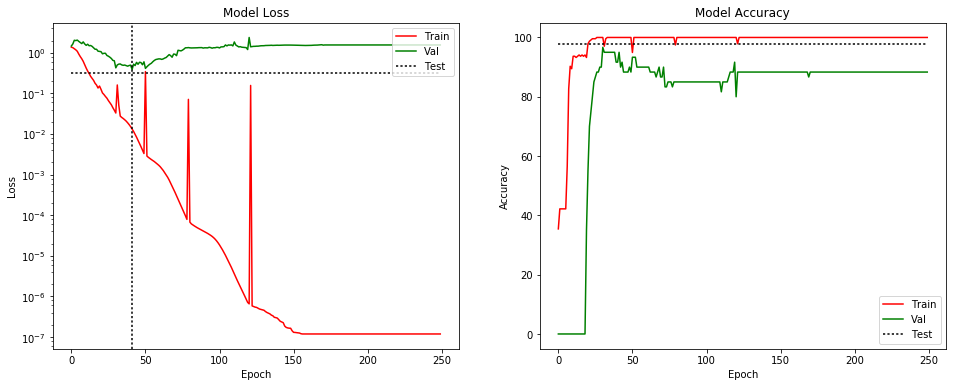

In [388]:
from utils.plots import *

plot_loss(history, score)

## Test Model

In [413]:
test_q = np.loadtxt('data/test_questions.txt', dtype=str, delimiter=',')
test_q = np.char.strip(test_q)

In [415]:
test_data = tokenizer.texts_to_sequences(test_q)

In [420]:
test_padded = pad_sequences(test_data, maxlen=max_length, padding='post')

In [422]:
model.predict(test_padded)

array([[1.0000000e+00, 5.3093814e-08, 4.9049738e-08, 5.1610827e-10],
       [1.0000000e+00, 4.8727568e-08, 4.6699792e-08, 5.4954319e-10],
       [1.0000000e+00, 5.0578372e-08, 4.7031602e-08, 5.6129762e-10],
       [6.9994186e-08, 2.5251239e-08, 9.9999988e-01, 1.9017738e-09],
       [9.3995077e-08, 9.9999976e-01, 1.3859640e-09, 7.5044532e-08],
       [1.2211773e-08, 7.9904162e-08, 1.6790787e-08, 9.9999988e-01],
       [1.0000000e+00, 5.0137221e-08, 4.6979601e-08, 5.5554611e-10],
       [8.2055152e-08, 9.9999988e-01, 5.9003047e-10, 1.4227235e-08],
       [6.9963086e-08, 2.5340691e-08, 9.9999988e-01, 1.9082269e-09],
       [8.2055152e-08, 9.9999988e-01, 5.9003047e-10, 1.4227235e-08]],
      dtype=float32)